In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the data

In [ ]:
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
# Convert age from days to years
df['age'] = df['age'] / 365

# Convert categorical gender to binary
df['gender'] = df['gender'] - 1

# Drop id column
df = df.drop('id', axis=1)

# Normalize the data
cols_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df[cols_to_normalize] = df[cols_to_normalize].apply(lambda x: (x - x.mean()) / x.std())


In [ ]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, verbose=0)


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)


438/438 [==============================] - 1s 1ms/step
[[5351 1637]
 [2001 5011]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



438/438 [==============================] - 1s 1ms/step
Accuracy: 0.7401428571428571
Precision: 0.7537605294825511
Recall: 0.7146320593268682
F1 Score: 0.7336749633967788
438/438 [==============================] - 2s 5ms/step
[[5351 1637]
 [2001 5011]]


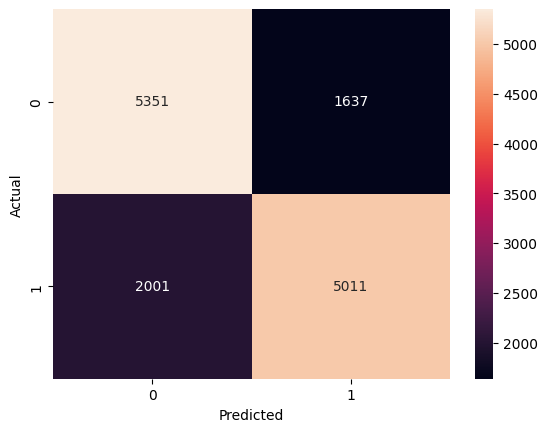

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Here's an code that adjusts the threshold and prints the accuracy, precision, recall, and F1 scores:

438/438 [==============================] - 1s 1ms/step
Accuracy: 0.659
Precision: 0.6062476262818078
Recall: 0.9105818596691386
F1 Score: 0.7278841769265846
438/438 [==============================] - 1s 1ms/step
[[2841 4147]
 [ 627 6385]]


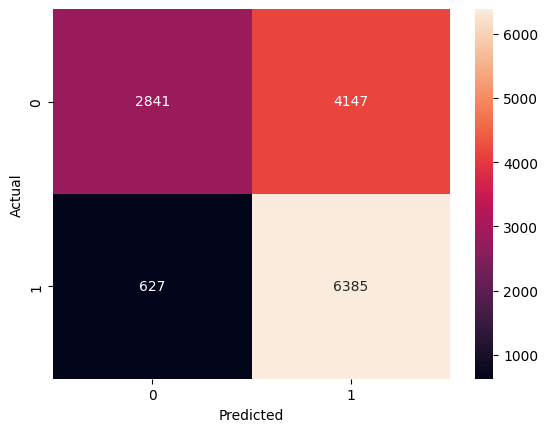

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# predict probabilities for test set
y_pred_prob = model.predict(X_test)

# set a lower threshold to increase sensitivity
threshold = 0.3
y_pred = (y_pred_prob > threshold)

# calculate and print scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
y_pred_prob = model.predict(X_test)

# set a lower threshold to increase sensitivity
threshold = 0.3
y_pred = (y_pred_prob > threshold)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(conf_matrix)

# plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# initialize the model
rf_model = RandomForestClassifier()

# fit the model to the training data
rf_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = rf_model.predict(X_test)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(conf_matrix)


Accuracy: 0.7142857142857143
Precision: 0.7203042715038034
Recall: 0.7022247575584712
F1 Score: 0.7111496244945118
[[5076 1912]
 [2088 4924]]


<Axes: >

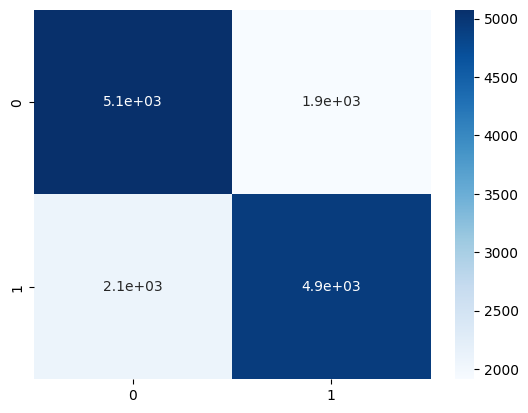

In [ ]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues')


<Axes: >

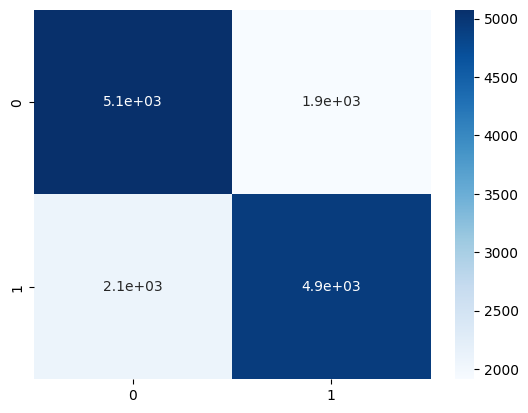

In [ ]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues')


Accuracy: 0.6268571428571429
Precision: 0.625034965034965
Recall: 0.6373359954363947
F1 Score: 0.6311255472390905
[[4307 2681]
 [2543 4469]]


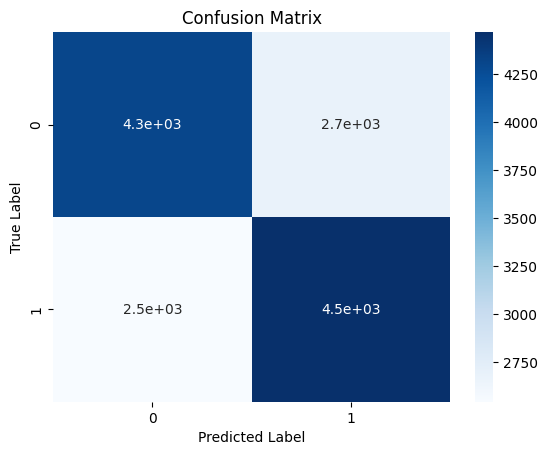

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# initialize the model
dt_model = DecisionTreeClassifier()

# fit the model to the training data
dt_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = dt_model.predict(X_test)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

# plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize the model
nb_model = GaussianNB()

# fit the model to the training data
nb_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = nb_model.predict(X_test)

# calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(conf_matrix)


Accuracy: 0.5944285714285714
Precision: 0.7111528822055138
Recall: 0.32308568175348706
F1 Score: 0.4443139557643374
[[9078 1383]
 [7134 3405]]
